## Introduction

We have data from entertainment app Procrastinate Pro+. Despite huge investments in advertising, the company has been losing money for the last few months. Our task is to understand the reasons and help the company to get to the plus side.


There is data about users engaged from May 1 to October 27, 2019:


- Server log with data about their visits,
- downloading their purchases for that period,
- advertising expenditures.


To be explored:


- Where users come from and what devices they use,
- how much it costs to attract users from different advertising channels;
- how much money each customer brings in,
- when the cost of attracting a client pays off,
- what factors hinder customer acquisition.


Data description:
- visits_info_short.csv file stores server log with information about site visits,
- file orders_info_short.csv - information about orders,
- costs_info_short.csv file - information about advertising expenses.

### Loading data and preparing it for analysis

Load visit, order, and advertising spend data from CSV files into variables.




**File paths**


- Visits: `/datasets/visits_info_short.csv`. [Download dataset](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- orders: `/datasets/orders_info_short.csv``. [Download dataset](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- costs: `/datasets/costs_info_short.csv`. [Download dataset](https://code.s3.yandex.net/datasets/costs_info_short.csv).


Examine the data and perform preprocessing. Are there any gaps or duplicates in the data? Make sure that the data types in all columns match the values stored in them. Pay attention to the date and time columns.

Let's immediately load the libraries we need for our work:

In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import time
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Uploading data files:

In [2]:

try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

For the primary analysis of the datasets, we use the function:

In [3]:
def primary_analysis(df, dataset_name):
    
    print(f"--- Primary analysis for: {dataset_name} ---\n")
    
    # Output general information about the dataframe
    print("1. Dataframe information:\n")
    print(df.info())
    print("\n")
    
    # Show the first lines of the dataframe
    print("2. The first five lines.n")
    print(df.head())
    print("\n")
    
    # Descriptive statistics
    print("3. Descriptive statistics:\n")
    print(df.describe())
    print("\n")
    
    # Analysis of the most frequent values
    print("4. Most frequent values in each column:\n")
    for column in df.columns:
        print(f"column: {column}")
        print(df[column].value_counts().head(5)) 
        print("\n")


In [4]:
primary_analysis(visits, "visits")
primary_analysis(orders, "orders")
primary_analysis(costs, "costs")

--- Primary analysis for: visits ---

1. Dataframe information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


2. The first five lines.n
        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United 

Let's preprocess the data: convert columns with dates to datetime type, convert column names to snake case, check for obvious duplicates.

In [5]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [7]:
visits_duplicates = visits.duplicated().sum()
print(f"Obvious duplicates in the visits: {visits_duplicates}")

orders_duplicates = orders.duplicated().sum()
print(f"Obvious duplicates in the orders: {orders_duplicates}")

costs_duplicates = costs.duplicated().sum()
print(f"Obvious duplicates in the costs: {costs_duplicates}")


Obvious duplicates in the visits: 0
Obvious duplicates in the orders: 0
Obvious duplicates in the costs: 0


**Data preprocessing conclusions:**

Table **visits** 
- User Id - unique identifier of the user,
- Region - user's country,
- Device - user's device type,
- Channel - identifier of the transition source,
- Session Start - date and time of session start,
- Session End - date and time of session end.

**Data Dimensions**  
- The table contains **309,901 rows** and **6 columns**.  
- The data is complete, with no omissions.  

**Data Types**  
- **Temporal Columns** (`Session Start`, `Session End`):  
  - Presented in text format and required conversion to `datetime` type for analysis.  

**User Statistics**.  
- A wide variety of users are present.  
- Some IDs occur significantly more frequently, which may indicate high activity.  

**Frequent Values**.  
- The majority of users are from the **USA**.  
- The most popular device is the **iPhone**.  
- The main channel of engagement is **organic**.
---

Table **orders**
- User Id - unique identifier of the user,
- Event Dt - date and time of purchase,
- Revenue - order amount.

**Data Dimensions**
- The table contains **40,212 rows** and **3 columns**.
- The data is complete.

**Data Types**
- The `Event Dt` time column required conversion to `datetime` format.

**Order Statistics**
- **Average revenue per order**: `$`5.37
- **Median order value**: `$`4.99
  - This indicates standardized or fixed prices.
- **Maximum order value**: `$`49.99

**Frequent values**.
- Most orders have a value of `$`**4.99 (96%)**.
- Some users are significantly more active, for example, one user made **22 orders**.Table **orders**
- User Id - unique identifier of the user,
- Event Dt - date and time of purchase,
- Revenue - order amount.

**Data Dimensions**
- The table contains **40,212 rows** and **3 columns**.
- The data is complete.

**Data Types**
- The `Event Dt` time column required conversion to `datetime` format.

**Order Statistics**
- **Average revenue per order**: `$`5.37
- **Median order value**: `$`4.99
  - This indicates standardized or fixed prices.
- **Maximum order value**: `$`49.99

**Frequent values**.
- Most orders have a value of `$`**4.99 (96%)**.
- Some users are significantly more active, for example, one user made **22 orders**.

---

Table **costs**
- dt - date of the advertising campaign,
- channel - advertising source identifier,
- costs - expenses for this campaign.

**Data Size**
- The table contains **1,800 rows** and **3 columns**.
- The data is complete.

**Data Types**
- **Date** (`dt`) required conversion to the `datetime` type.

**Cost Statistics**
- **Average Daily Costs**: `$` 58.61
- **Standard deviation**: `$` 107.74, indicating strong variation.
- **Maximum costs**: `$` 630 

### Define functions for calculating and analyzing LTV, ROI, retention and conversion.


It is allowed to use the functions that you learned about in the theoretical lessons.


These are functions for calculating metrics values:


- `get_profiles()` - to create user profiles,
-`get_retention()` - to calculate Retention Rate,
- `get_conversion()` - for conversion calculation,
-`get_ltv()` - for LTV calculation.


And also functions for plotting graphs:


- `filter_data()` - for smoothing data,
- `plot_retention()` - toplot Retention Rate,
- `plot_conversion()` - for plotting the Conversion Rate,
- `plot_ltv_roi` - to visualize LTV and ROI.

In [8]:
# function for creating user profiles
def get_profiles(sessions, orders, ad_costs):
    # Make copies of the dataframes to avoid modifying the originals
    sessions_copy = sessions.copy()
    orders_copy = orders.copy()
    ad_costs_copy = ad_costs.copy()
    
    # Ensure datetime columns are properly formatted
    for df in [sessions_copy, orders_copy, ad_costs_copy]:
        for col in df.select_dtypes(include=['datetime']).columns:
            df[col] = pd.to_datetime(df[col])

    # find the parameters of the first visits
    profiles = (
        sessions_copy.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for the cohort analysis, we determine the date of the first visit
    # and the first day of the month in which the visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'])  # Removed format parameter
    
    # Use to_datetime with explicit format instead of astype
    profiles['month'] = pd.to_datetime(profiles['first_ts']).dt.to_period('M').dt.to_timestamp()

    # add an attribute for paying users
    profiles['payer'] = profiles['user_id'].isin(orders_copy['user_id'].unique())

    # count the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # Combine ad spend and user acquisition rates
    ad_costs_merged = ad_costs_copy.merge(new_users, on=['dt', 'channel'], how='left')

    # divide advertising costs by the number of users attracted
    # save the results to the acquisition_cost (CAC) column
    ad_costs_merged['acquisition_cost'] = ad_costs_merged['costs'] / ad_costs_merged['unique_users']

    # add the cost of engagement to profiles
    profiles = profiles.merge(
        ad_costs_merged[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of attracting organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [9]:
# function for calculating retention
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # add the payer column to the list passed to dimensions
    dimensions = ['payer'] + dimensions

    # exclude users who didn't make it to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collect "raw" data to calculate withholding
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

   # function for grouping the table by desired attributesм
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the hold table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # get the table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time 

In [10]:
#conversion calculation function
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who didn't make it to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # collect "raw" data to calculate withholding
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    #function for grouping the table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each "cell" in the row by the cohort size
        # and get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # we get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time 

In [11]:
# function for calculating LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who didn't make it to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # add shopping data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate user lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function of grouping by desired features
    def group_by_dimensions(df, dims, horizon_days):
        # build a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # find the amount of revenue with accrual
        result = result.fillna(0).cumsum(axis=1)
        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # combine cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculate LTV: divide each "cell" in the row by the cohort size
        result = result.div(result['cohort_size'], axis=0)
        # exclude all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # collect dataframe with user data and CAC values, 
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculate average CAC by parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # delete lines with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # add CAC to the ROI table
        roi['cac'] = cac['cac']

        # in the final table leave the cohort sizes, CAC
        # and ROI in lifetimes that do not exceed the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return LTV and ROI tables
        return result, roi

    # get LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for speaker tables remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    ) 

Functions for visualization:

In [12]:
# function for smoothing the frame

def filter_data(df, window):
    # Apply a moving average to each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [13]:
# function for visualizing the hold

def plot_retention(retention, retention_history, horizon, window=7):

    # set the grid size for the graphs
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and first day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # in the dynamics table, leave only the required lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if only payer is in the hold table indexes,
    # add a second characteristic - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in a chart table - two columns and two rows, four cells
    # in the first we plot the retention curves of paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # in the second cell, plot the retention curves for non-payers
    #vertical axis - from the graph from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Уretention of non-paying users')

    # in the third cell - dynamics of payer retention
    ax3 = plt.subplot(2, 2, 3)
    # get column names for the summary table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filter the data and plot the graph
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of involvement')
    plt.title(
        'Dynamics of retention of paying users on {}th day'.format(
            horizon
        )
    )

    # in the fourth cell - the dynamics of non-payers' retention
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter the data and plot the graph
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Date of involvement')
    plt.title(
        'Dynamics of retention of non-paying users on {}th day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [38]:
# function for conversion visualization

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # set the grid size for the graphs
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # in the dynamics table, leave only the required lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    #first graph - conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # the second graph is the conversion rate
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # the summary table columns will be all index columns except the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of involvement')
    plt.title('Dynamics of user conversion on {}th day'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [15]:
# function to visualize LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # set the grid for drawing the graphs
    plt.figure(figsize=(20, 10))

    # exclude cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # in the table of ltv dynamics, leave only the required lyftime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # the cost of attraction will be written in a separate frame
    cac_history = roi_history[['cac']]

    # exclude cohort and cac sizes from the roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # in the table of roi dynamics leave only the required lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # first graph - ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # second graph - ltv dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # the summary table columns will be all index columns except the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of involvement')
    plt.title('Dynamics of LTV of users on {}th day'.format(horizon))

    # third chart - cac dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # the summary table columns will be all index columns except the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of involvement')
    plt.title('Dynamics of the cost of attracting users')

   # fourth graph - roi curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback rate')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # fifth chart - roi dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # the summary table columns will be all index columns except the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback rate')
    plt.xlabel('Date of involvement')
    plt.title('Dynamics of ROI of users on {}th day'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Research data analysis


- Let's compile user profiles. Determine the minimum and maximum dates of user engagement.
- Find out from which countries users come to the application and which country has the most paying users. Build a table showing the number of users and the share of paying users from each country.
- Find out which devices are used by customers and which devices are preferred by paying users. Build a table showing the number of users and the share of paying users for each device.
- Examine the advertising sources of engagement and identify the channels with the most paying users. Build a table showing the number of users and the share of paying users for each engagement channel.





**Generate user profiles using the `get_profiles`function **:

In [16]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Let's determine the time frame of user engagement by finding the minimum and maximum dates:

In [17]:
print(profiles['dt'].min())
print(profiles['dt'].max())

2019-05-01 00:00:00
2019-10-27 00:00:00


**Determine from which countries the app users come from and identify the country with the highest number of paying users. Create a table showing the total number of users and the proportion of paying users for each country:**

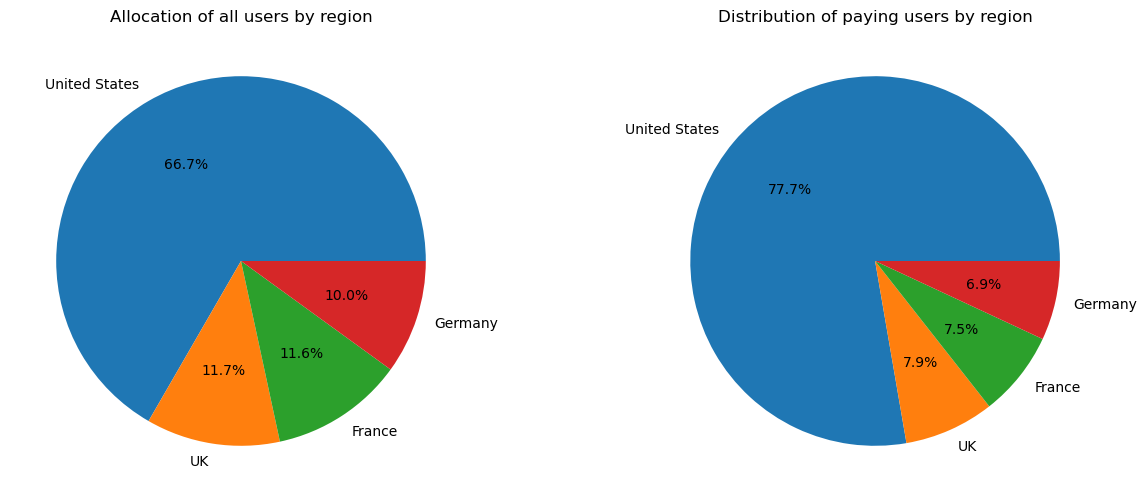

,user_id,payer,payment_rate
region,,,
United States,100002,6902,6.901862
UK,17575,700,3.982930
France,17450,663,3.799427
Germany,14981,616,4.111875


In [18]:
import matplotlib.pyplot as plt

# Group data by region, calculate total number of users and paying users
region_stats = profiles.groupby('region').agg({'user_id': 'count', 'payer': 'sum'}).sort_values(by='user_id', ascending=False)

# Add a column with the percentage of paying users in each region
region_stats['payment_rate'] = (region_stats['payer'] / region_stats['user_id']) * 100

# Create pie charts to visualize user distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Chart of the share of all users by region
axes[0].pie(region_stats['user_id'], labels=region_stats.index, autopct='%1.1f%%')
axes[0].set_title('Allocation of all users by region')

# Chart of the share of paying users by region
axes[1].pie(region_stats['payer'], labels=region_stats.index, autopct='%1.1f%%')
axes[1].set_title('Distribution of paying users by region')

# Display charts
plt.show()

# Output a summary table with the calculated data
region_stats


**Conclusions:**


**Distribution of users**
- The majority of users(**66.7%**) are from the **United States**.
- The UK, France and Germany make up between**10% and 12%** each.


**Distribution of paying users**.
- **77.7%** of **paying users are from the **UnitedStates**.
- The remaining regions (Germany, France, UK) have about**7-8% paying users each**.


**Percentage of paying users (Payment Rate)**
- The highest percentage of paying users is**6.9%** in **UnitedStates**.
- **Germany **shows**4.1%**, UK -**4.0%**, France -**3.8%**.


**Overall Conclusions**.
- ** TheUS** is the key market in terms of users and payers.
- European regions have similar activity but a lower share of paying users.



**Let's find out what devices are used by customers and what devices are preferred by paying users:**

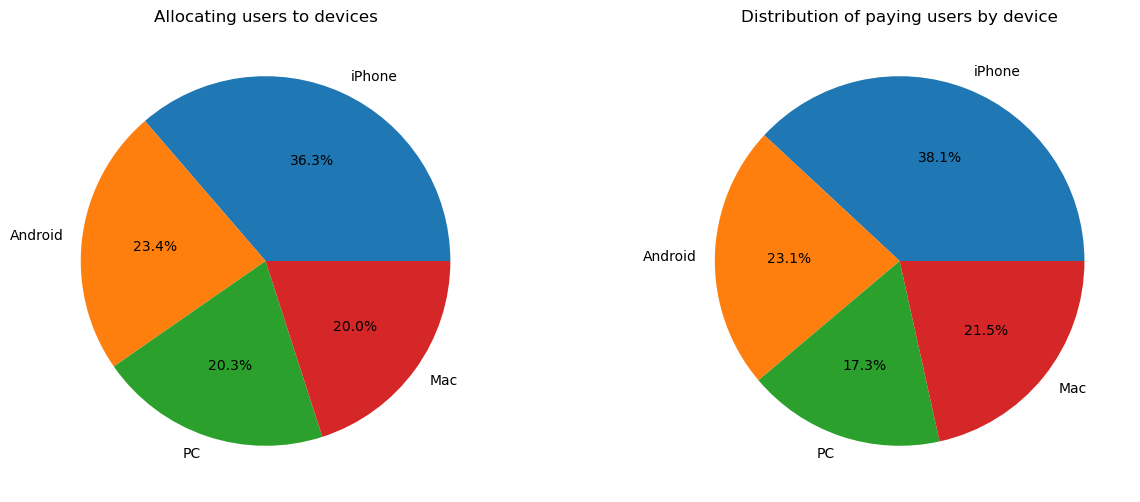

,user_id,payer,payment_rate
device,,,
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790
Mac,30042,1912,6.364423


In [19]:
# Group the data by device, calculate the total number of users and paying users
device_stats = profiles.groupby('device').agg({'user_id': 'count', 'payer': 'sum'}).sort_values(by='user_id', ascending=False)

# Add a column with the percentage of paying users for each device type
device_stats['payment_rate'] = (device_stats['payer'] / device_stats['user_id']) * 100

# Create pie charts to visualize user distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Chart of the proportion of all users by device
axes[0].pie(device_stats['user_id'], labels=device_stats.index, autopct='%1.1f%%')
axes[0].set_title('Allocating users to devices')

# Chart of share of paying users by device
axes[1].pie(device_stats['payer'], labels=device_stats.index, autopct='%1.1f%%')
axes[1].set_title('Distribution of paying users by device')

# Display charts
plt.show()

# Output a summary table with the calculated data
device_stats


**Conclusions:**


**Distribution of users**
- The majority of users use **iPhone (36.3%)**.
- This is followed by **Android (23.4%)**, **PC (20.3%)** and **Mac (20.0%)**.


**Distribution of paying users**.
- The **iPhone (38.1%)** has the highest proportion of paying users.
- This is followed by **Android (23.1%) ** , **Mac (21.5%)** and **PC (17.3%)**.


**Payment Rate**.
-**Mac**leads the way with**6.36%**.
- This is followed by **iPhone (6.21%)**, **Android (5.85%)** and **PC (5.05%)**.



**Examine advertising sources of attraction and identify the channels from which the most paying users came:**

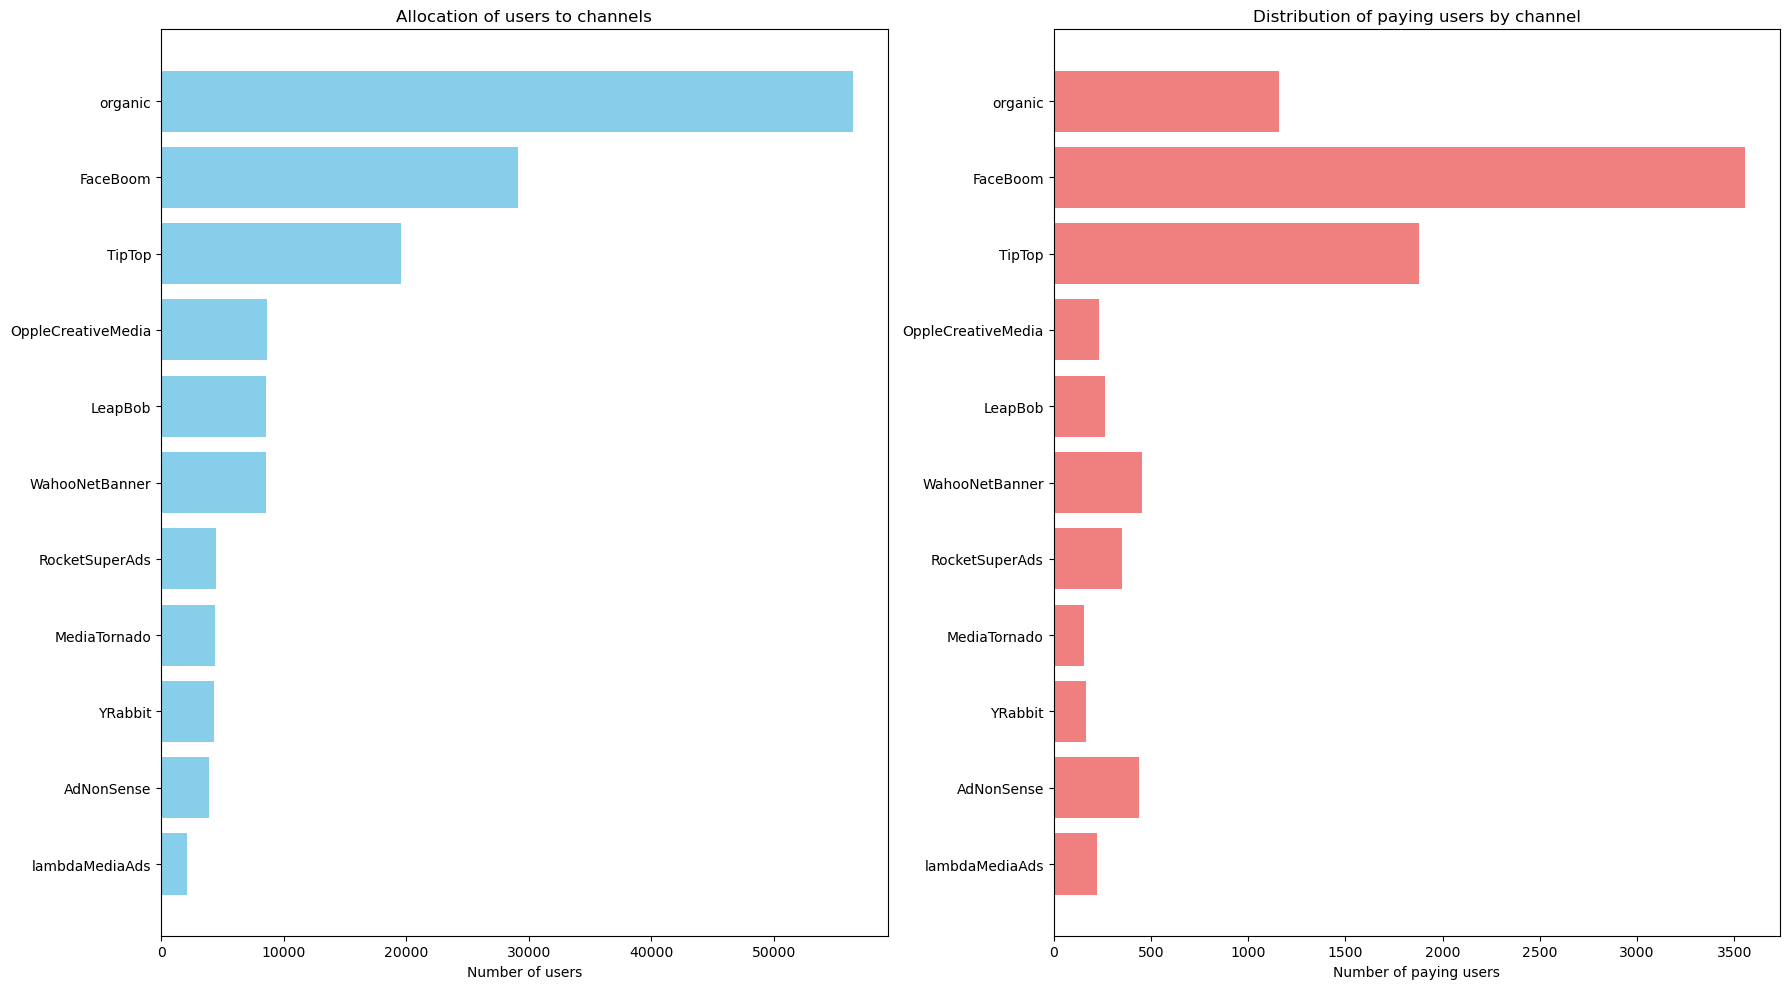

In [20]:
import matplotlib.pyplot as plt

# Group the data by channel, calculate the total number of users and paying users
channel_stats = profiles.groupby('channel').agg({'user_id': 'count', 'payer': 'sum'}).sort_values(by='user_id', ascending=False)

# Add a column with the percentage of paying users for each channel
channel_stats['payment_rate'] = (channel_stats['payer'] / channel_stats['user_id']) * 100

# Sort the data in descending order of the number of users
channel_stats = channel_stats.sort_values(by='user_id', ascending=False)

# Create bar charts
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Chart of the share of all users by channel
axes[0].barh(channel_stats.index, channel_stats['user_id'], color='skyblue')
axes[0].set_title('Allocation of users to channels')
axes[0].set_xlabel('Number of users')
axes[0].invert_yaxis()

# Chart of the share of paying users by channel
axes[1].barh(channel_stats.index, channel_stats['payer'], color='lightcoral')
axes[1].set_title('Distribution of paying users by channel')
axes[1].set_xlabel('Number of paying users')
axes[1].invert_yaxis()

# Increase the distance between the graphs
plt.tight_layout()
plt.show()


**Conclusions**:


**Distribution of users by channel**.
- The **organic** channel attracts the majority of users, far ahead of the other channels.
- The second place is occupied by **FaceBoom**, then **TipTop**.
- The rest of the channels have a noticeably smaller share.


**Distribution of paying users**
- Among paying users, **FaceBoom** is the leader, ahead of **TipTop** and **organic** despite having fewer total users.
- The other channels also attract significantly fewer paying users.



**Key findings from the exploratory data analysis:**


**Major regions**.
- **The United States** leads in the number of users and payers.
- European regions show less paying activity.


**Devices**.
-**TheiPhone** has the highest number of users and paying users.
-**Mac** shows the highest percentage of paying activity.


**Channels of engagement**
-**Organic** attracts the most users.
- **FaceBoom** and **TipTop** provide more paying users.  


### Marketing


- Let's calculate the total amount spent on marketing.
- Let's find out how the expenses are distributed by advertising sources, i.e. how much money was spent on each source.
- Let's build a graph visualizing the dynamics of changes in spending over time by week for each source. Then, on another graph, visualize the dynamics of changes in costs over time by month for each source.
- Let's find out how much it cost on average to attract one user (CAC) from each source.


**Let's calculate the total amount of marketing expenses and find out how the expenses are distributed by advertising sources**

In [21]:
total_costs = costs['costs'].sum()
print(f"Total advertising expenses amounted to {total_costs:,.2f}$")


Total advertising expenses amounted to 105,497.30$


Let's look at the distribution of marketing expenses by source:

In [26]:

numeric_columns = costs.select_dtypes(include=['number']).columns
costs.groupby('channel')[numeric_columns].sum().sort_values(by='costs', ascending=False)


,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Conclusion:**
the bulk of marketing expenses fall on TipTop and FaceBoom channels, which together account for more than 80% of all expenses.

Let's study the dynamics of expenditure change over time (by week and month) for each source:

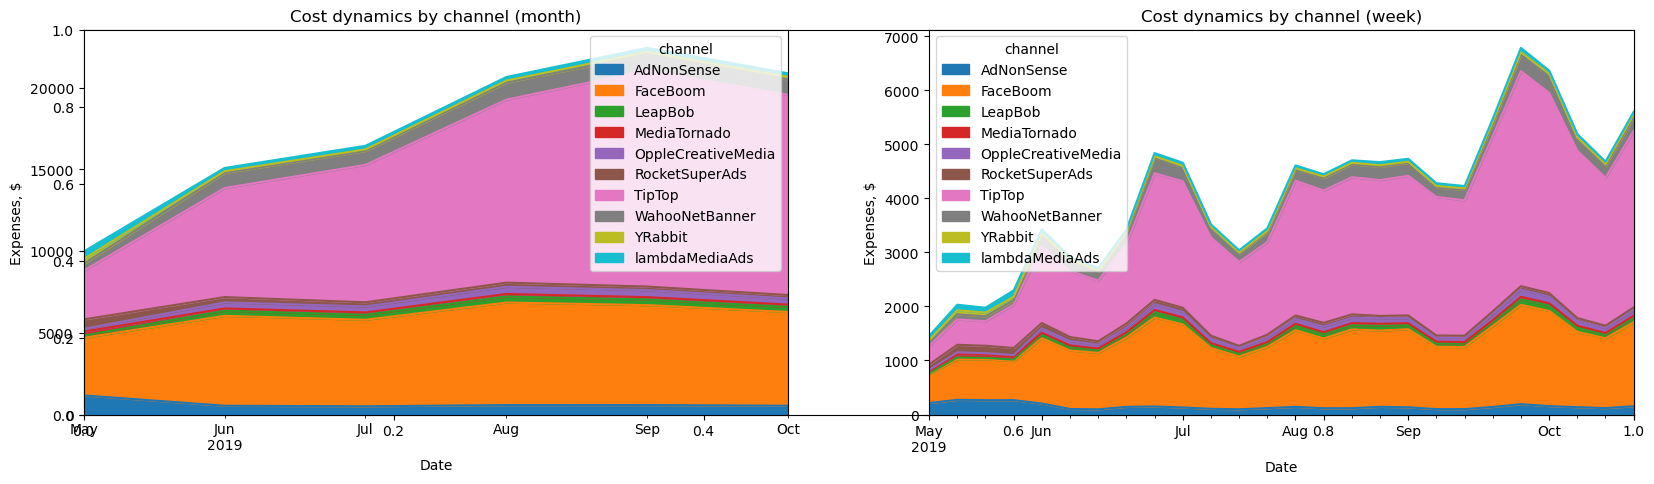

In [27]:
# Add a column with months and weeks based on the date
costs['month'] = costs['dt'].dt.to_period('M')
costs['week'] = costs['dt'].dt.to_period('W')

time_intervals = ['month', 'week']

# Plotting
plt.subplots(figsize=(20, 5))
for i, interval in enumerate(time_intervals):
    costs.pivot_table(index=interval, columns='channel', values='costs', aggfunc='sum').plot.area(ax=plt.subplot(1, 2, i + 1))
    plt.title(f'Cost dynamics by channel ({interval})')
    plt.xlabel('Date')
    plt.ylabel('Expenses, $')

plt.show()


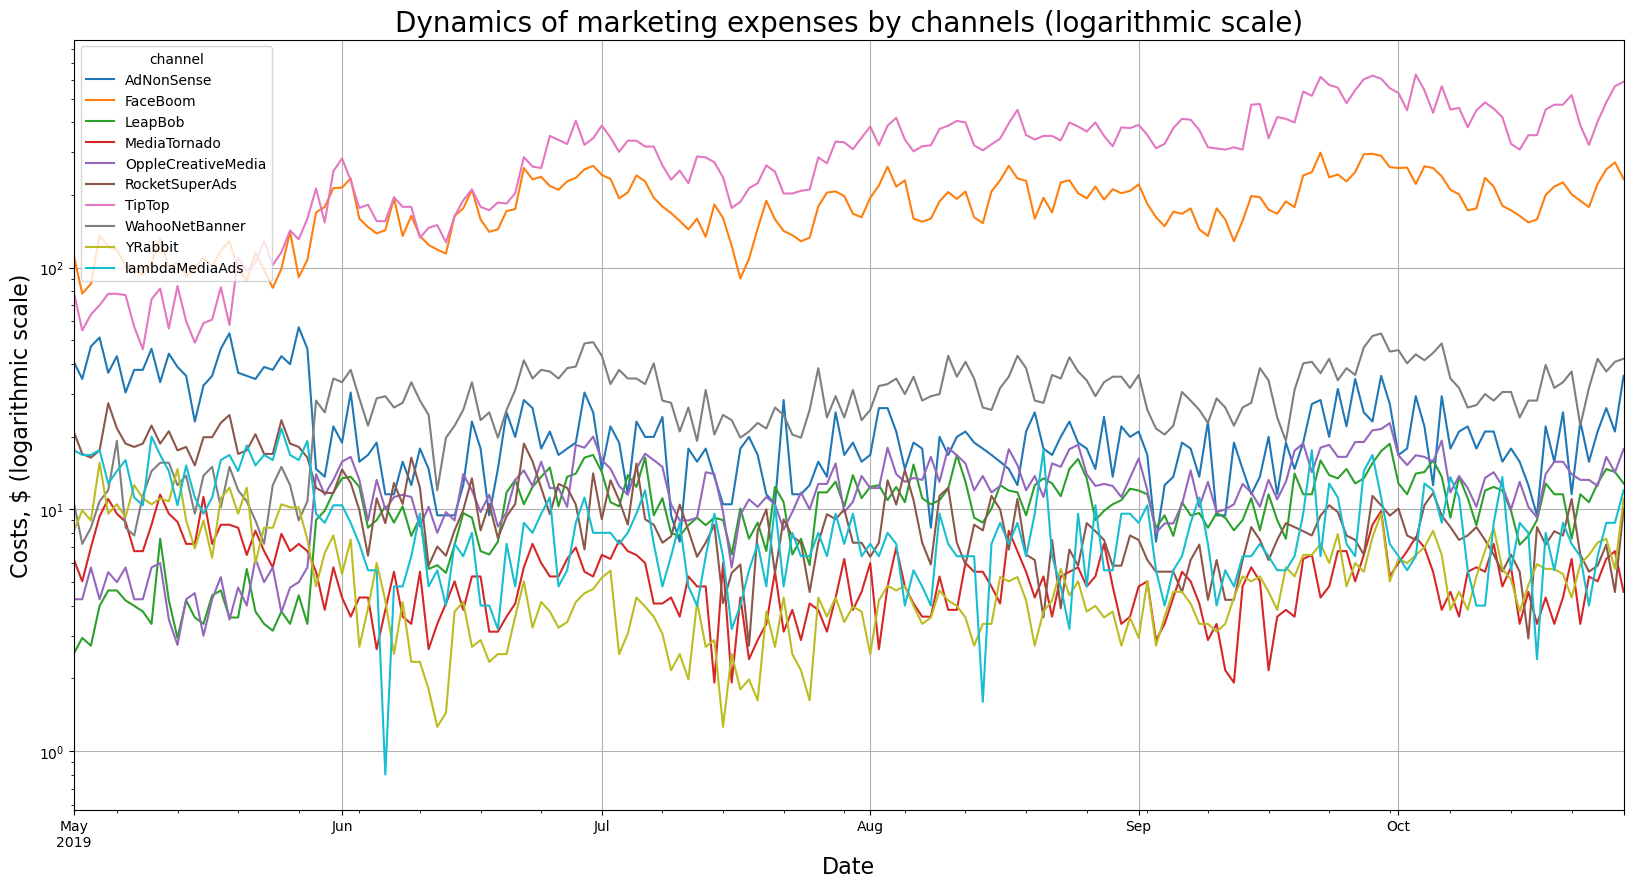

In [29]:
costs.pivot_table(
    index='dt', 
    columns='channel', 
    values='costs', 
).plot(figsize=(20, 10), grid=True, logy=True)  # Add a logarithmic scale to show fluctuations in lower cost channels

plt. title('Dynamics of marketing expenses by channels (logarithmic scale)',fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Costs, $ (logarithmic scale)',fontsize=16)

plt.show()


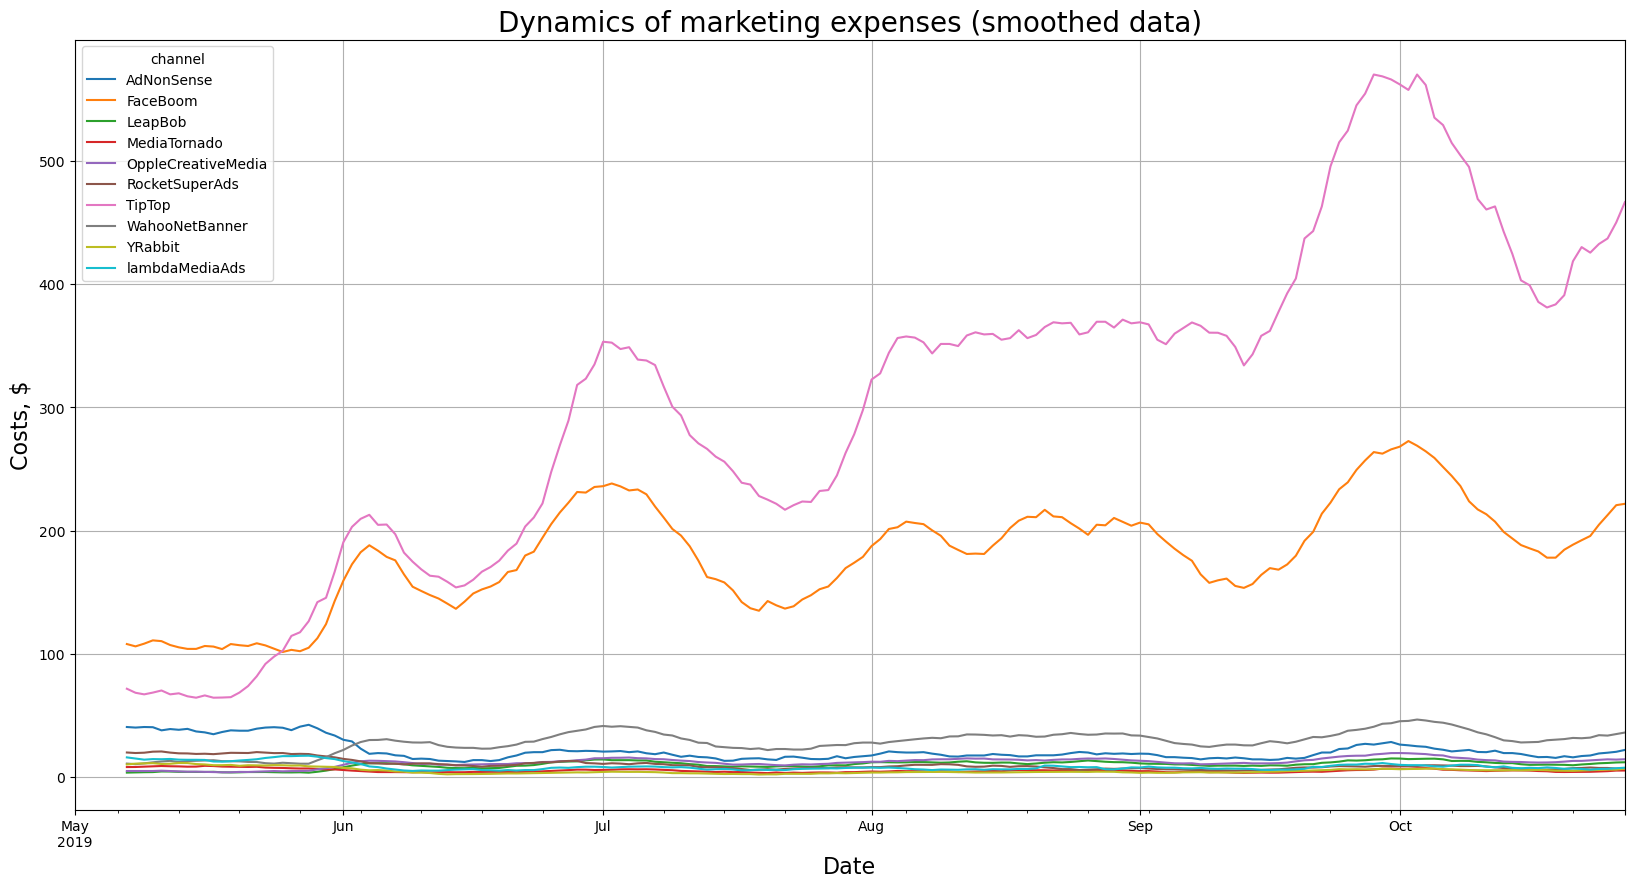

In [30]:
smoothed_costs = costs.pivot_table(
    index='dt', 
    columns='channel', 
    values='costs', 
    aggfunc='sum'
).rolling(window=7).mean()  # Moving average with a window of 7 days

smoothed_costs.plot(figsize=(20, 10), grid=True)

plt.title('Dynamics of marketing expenses (smoothed data)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Costs, $', fontsize=16)
plt.show()


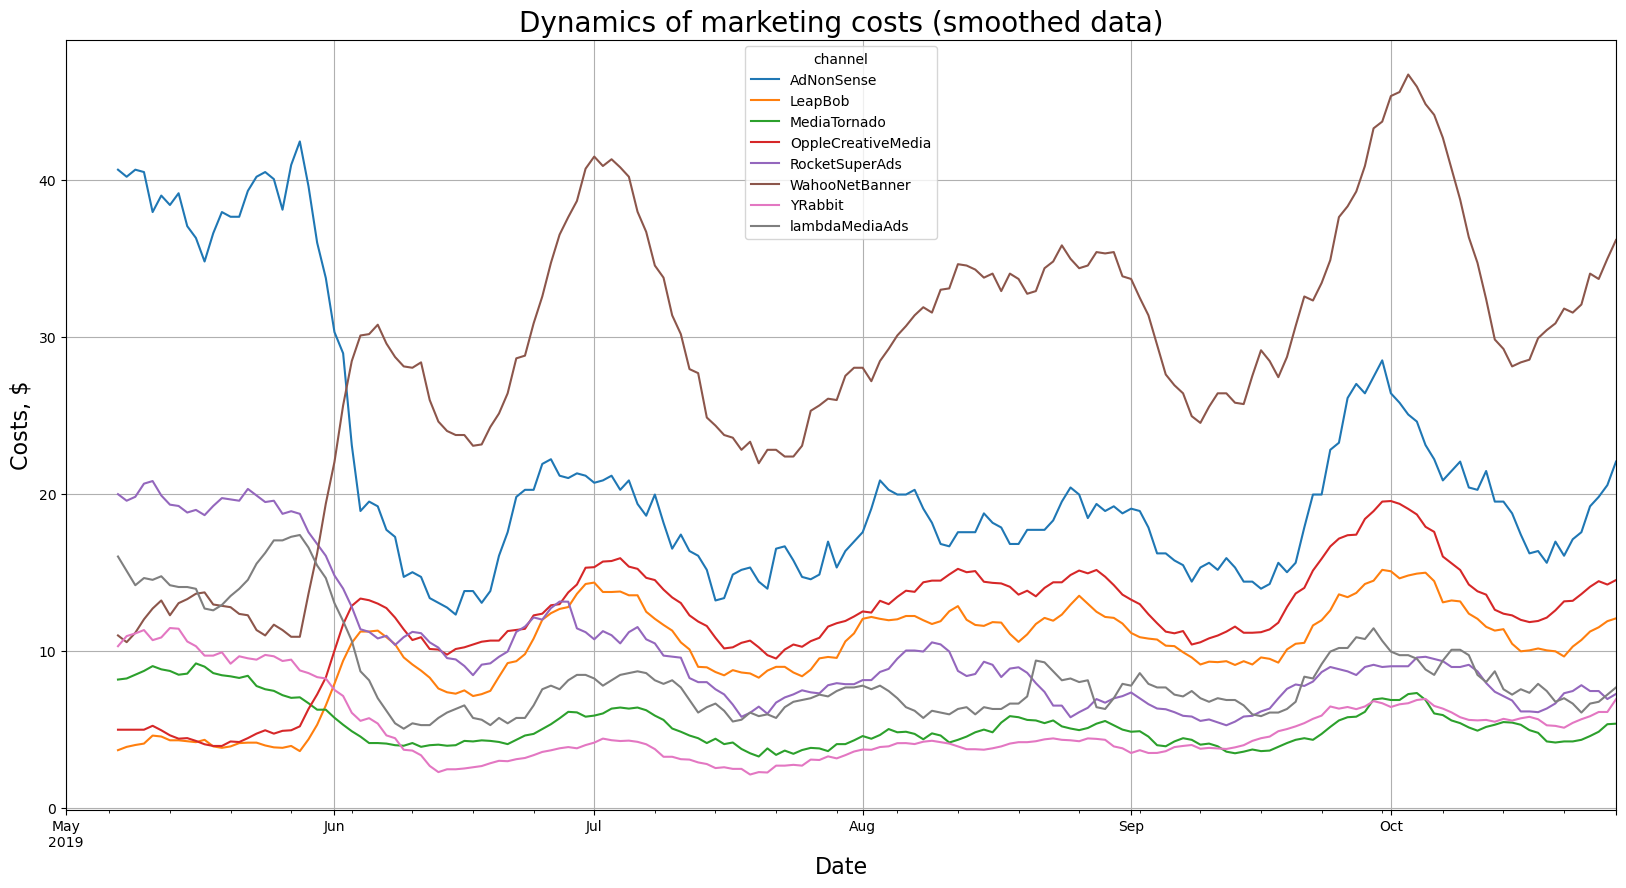

In [31]:
# Data filtering to exclude "TipTop" and "FaceBoom" channels
filtered_costs = costs.query('channel not in ["TipTop", "FaceBoom"]')

smoothed_costs = filtered_costs.pivot_table(
    index='dt',  
    columns='channel',  
    values='costs',  
    aggfunc='sum'  
).rolling(window=7).mean()  # Moving average with a window of 7 days

smoothed_costs.plot(figsize=(20, 10), grid=True)

plt. title('Dynamics of marketing costs (smoothed data)',fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Costs, $',fontsize=16)
plt.show()

**Conclusion:**


**High Costs.
- **TipTop** and **FaceBoom** dominate with notable peaks in **July** and **October**.


**Low Costs**LowCosts
- Channels **YRabbit**, **MediaTornado** and others remain stable and of low importance.

**Let's analyze the dynamics of CAC change:**

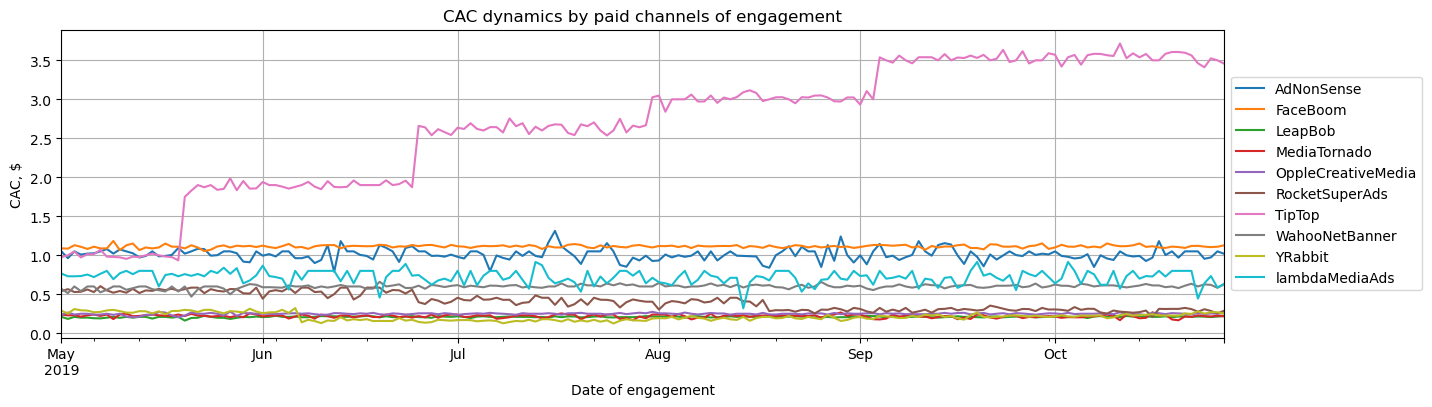

In [32]:
# Exclude users attracted from free channels
paid_profiles = profiles[profiles['acquisition_cost'] > 0]


# Analysis of CAC dynamics by paid channels
paid_cac_trend = paid_profiles.pivot_table(
    index='dt',
    columns='channel',
    values='acquisition_cost',
    aggfunc='mean'
)

paid_cac_trend.plot(grid=True, figsize=(15, 4))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('CAC, $')
plt.xlabel('Date of engagement')
plt. title('CAC dynamics by paid channels of engagement')

plt.show()


**Conclusions:**


**High CAC**.
- Channel **TipTop** shows the highest CAC exceeding **$3**, with steady growth.


**Stable CAC**
- Most channels, including **FaceBoom** and **AdNonSense**, have a stable CAC below **$1**.


### Evaluate the ROI of advertising


Using the LTV, ROI, and CAC charts, analyze your advertising ROI. Consider that November 1, 2019 is on the calendar, and the business plan assumes that users should pay off no later than two weeks after engagement. Determine the need to include organic users in the analysis on your own.


- Let's analyze the return on advertising with the help of LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.
- Let's check user conversion and its dynamics. Let's do the same with user retention. We'll build conversion and retention graphs.
- Analyze ad ROI by device. Build LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.
- Analyze advertising ROI by country. Build LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.
- Analyze advertising ROI by advertising channel. Build LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.

**Let's analyze the return on advertising with the help of LTV, ROI and CAC graphs, as well as graphs of LTV, CAC and ROI dynamics:**

In [33]:
profiles = profiles.query('channel != "organic"') #exclude organic users from the table.
observation_date = profiles['dt'].max() #moment of analysis
horizon_days = 14 #analysis horizon - 2 weeks

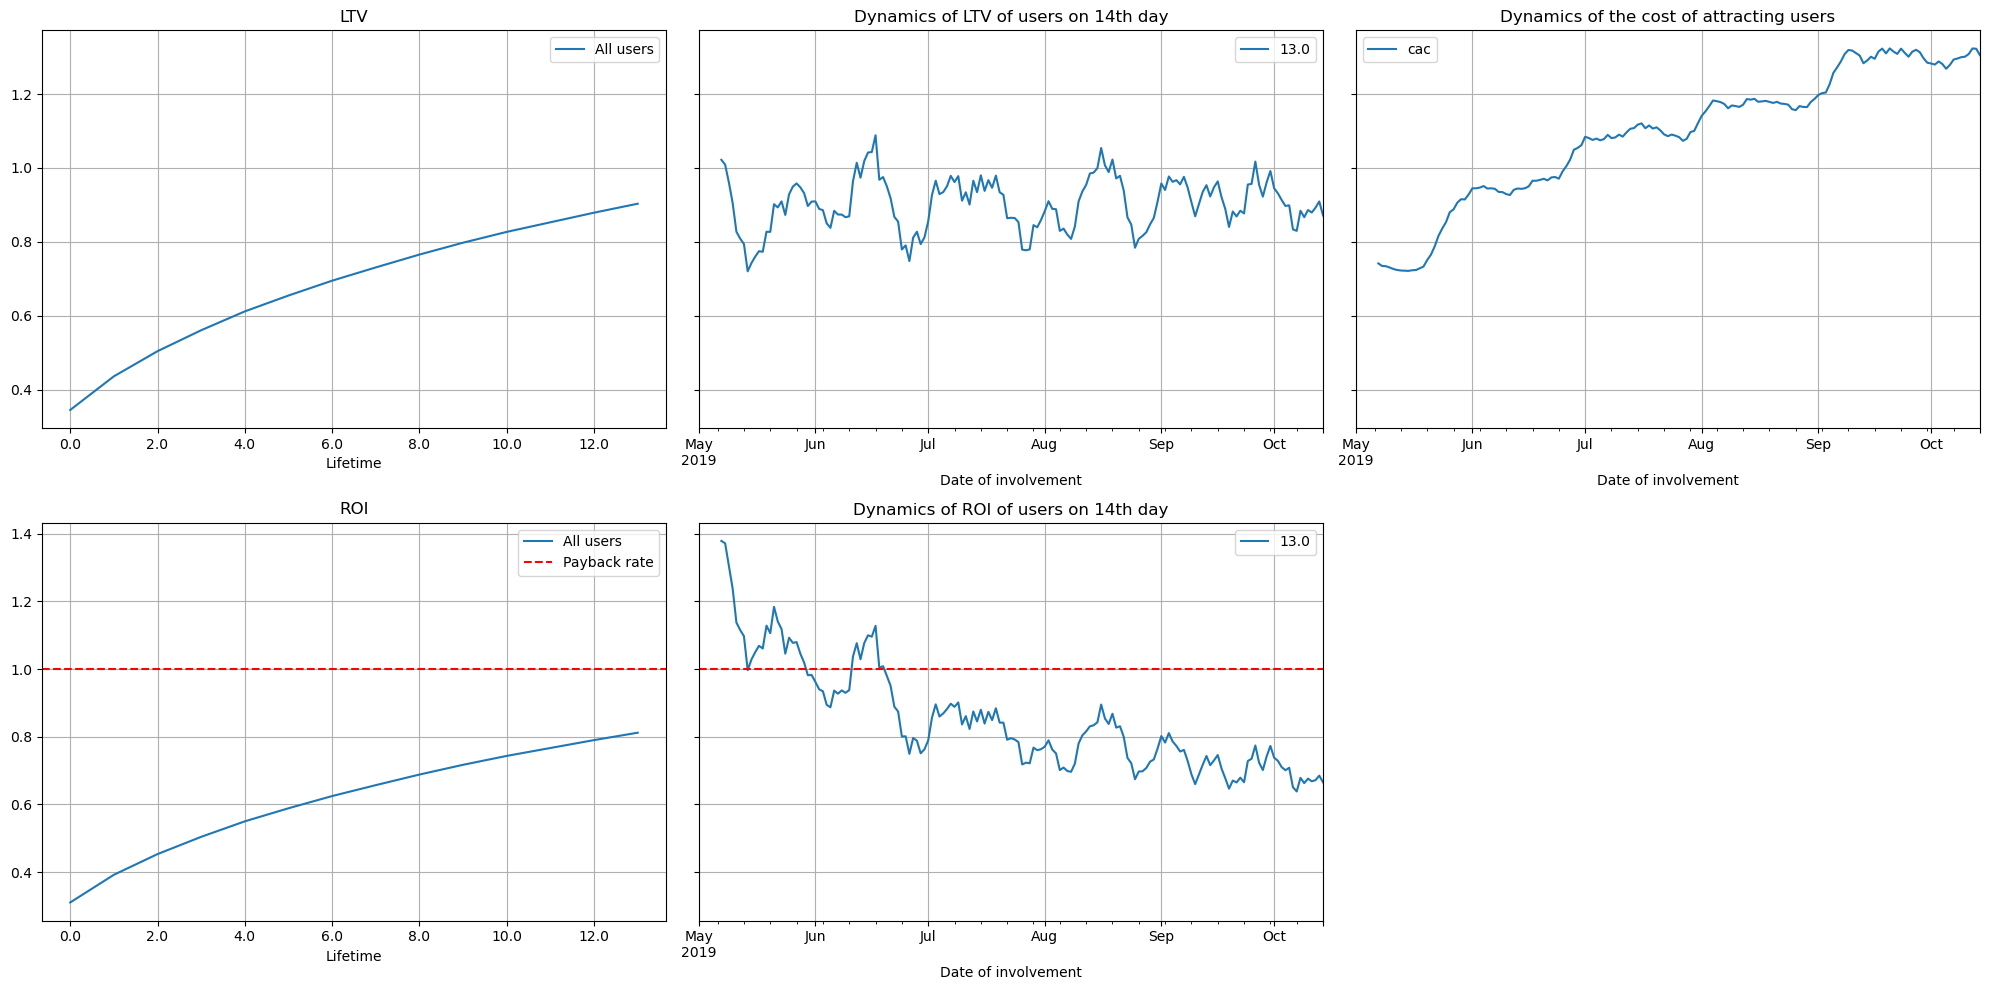

In [34]:
# Call the function to calculate LTV, ROI and their dynamics
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)


# Let's plot the graphs
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Withdrawal:**


**LTV**
- User value has been growing steadily across Lifetime, indicating good product health.


**LTV on day 14**
- The indicators are stable and practically do not change, which indicates that there are no problems with user behavior and interest in the product.


**CAC**
- The cost of customer acquisition is rising, which means marketing effectiveness is declining.


**ROI**
- Payback is not achieved on day 14, revenues cover only **80% of costs**.
- The application paid off only in May.

**We will check user conversion and its dynamics, as well as user retention. Let's build and study conversion and retention graphs:**

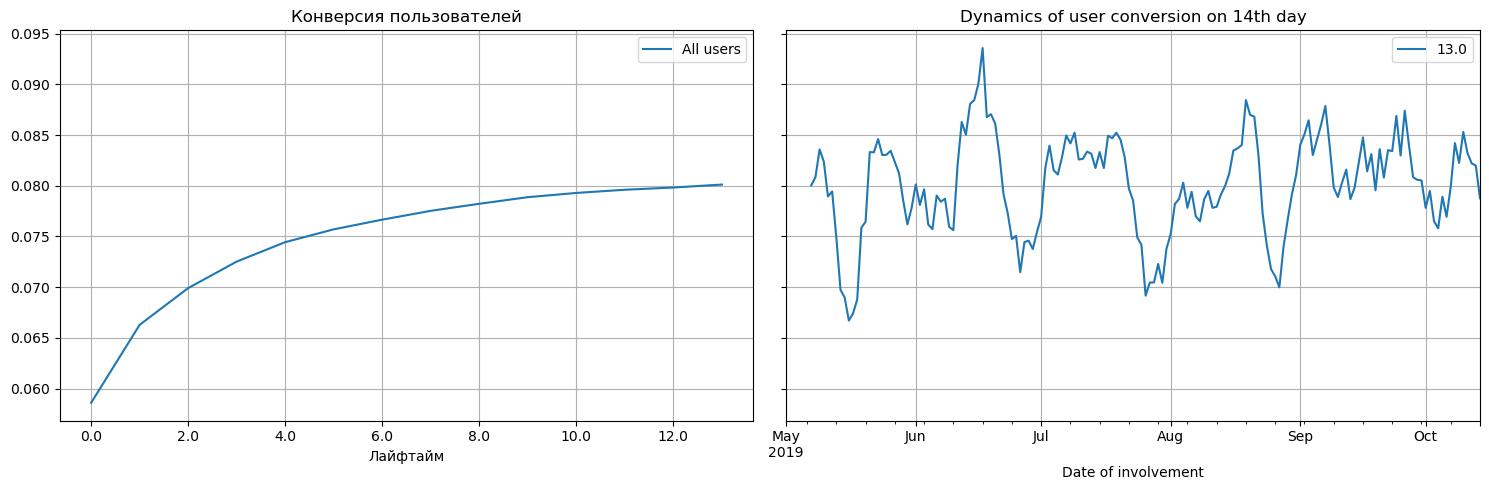

In [35]:
# Call the function to calculate the conversion rate
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Conclusion**:
Conversion shows steady growth and no significant problems in attracting and retaining users.

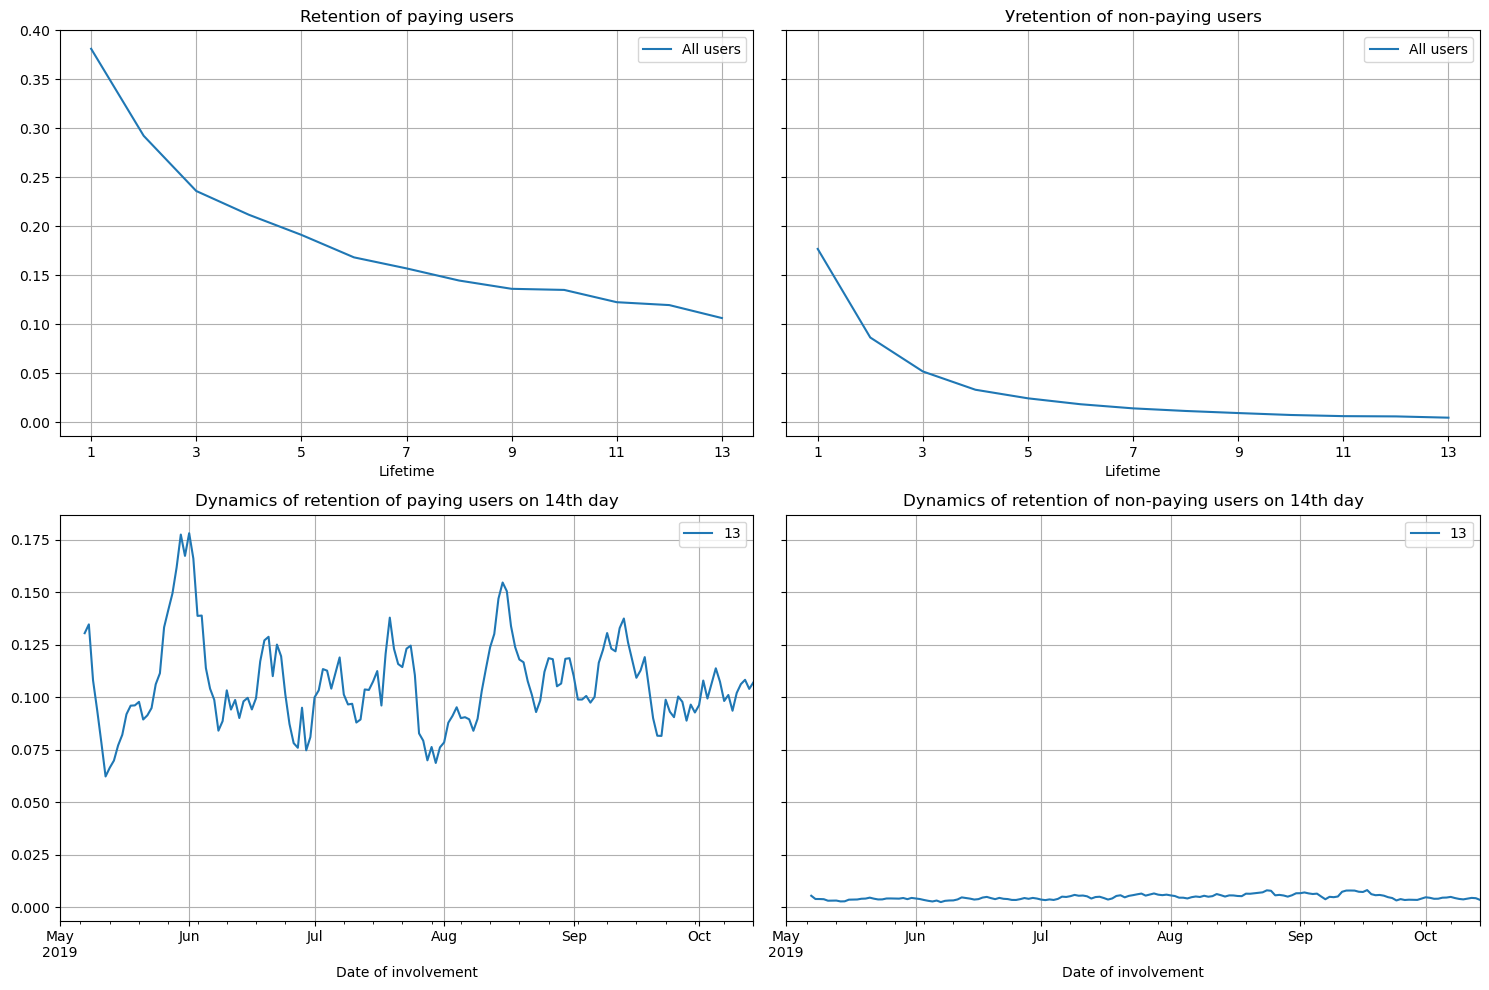

In [36]:
#Call the function to calculate user retention
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Conclusions:**


**Retention of paying users**
- Retention drops over time, but remains higher than non-paying users.


**Retention of non-paying users**
- Significantly lower and quickly tends to zero, indicating weak engagement.


**Dynamics on day 14**
- Retention of paying users shows fluctuations but remains stable.
- Retention of non-paying users is almost invariably low.



**Analyze ad ROI by device. Build LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics**

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Conclusions**:


**LTV**.
- Users of **iPhone** and **Mac** have the highest LTV, especially on long-lifetime.
-**PC** users have the lowest LTV.


**CAC**
- The cost of attracting **iPhone** users is significantly higher compared to other devices, reducing overall effectiveness.


**ROI**.
- Users of **Mac** pay off faster, reaching a level of **ROI > 1**.
-**PC** and**Android** remain below the ROI level.
- **iPhone** demonstrates stable but low ROI due to high CAC.



**Calculate user conversion by device:**

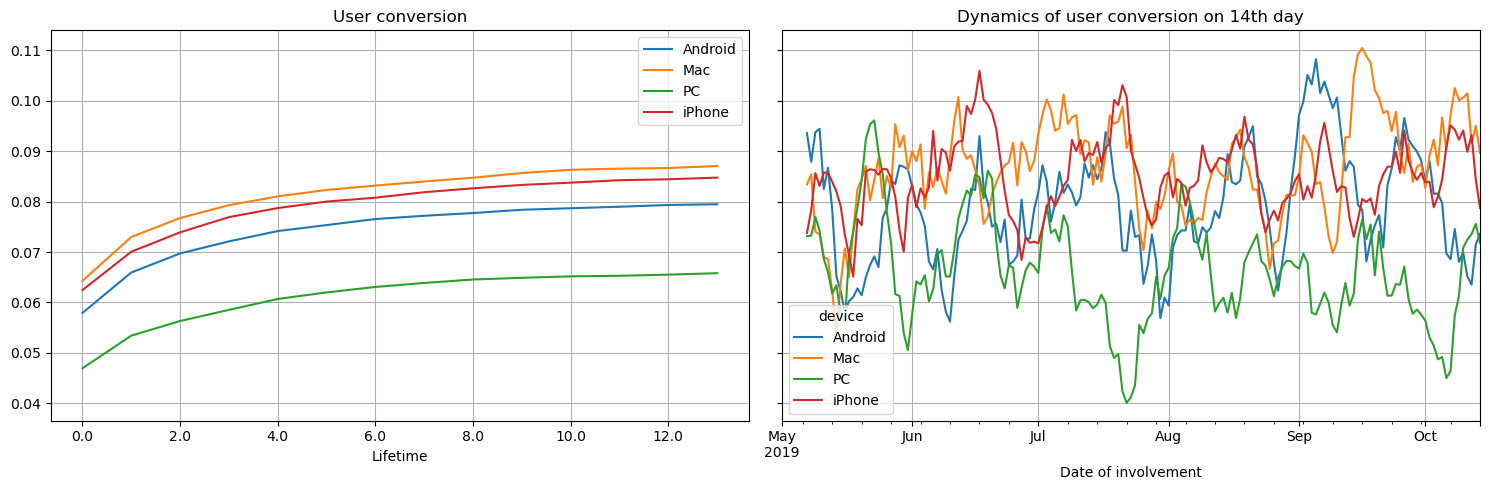

In [39]:
group_by = ['device']

conversion_raw, conversion_by_device, conversion_trend = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=group_by
)

plot_conversion(conversion_by_device, conversion_trend, horizon_days)


**Conclusions:**


**User Conversion (Lifetime)**.
- Users of **iPhone** and **Mac** have the highest conversion rate, reaching**9%**.
-**PC** users have the lowest conversion rate (~**6%**), indicating their lower engagement.


**Conversion dynamics on day 14**
- Conversion on day 14 for **iPhone** and **Mac** users remains stable with some fluctuations.
- Conversion of**PC** users shows instability and remains the lowest.



**Analyze user retention by device:**


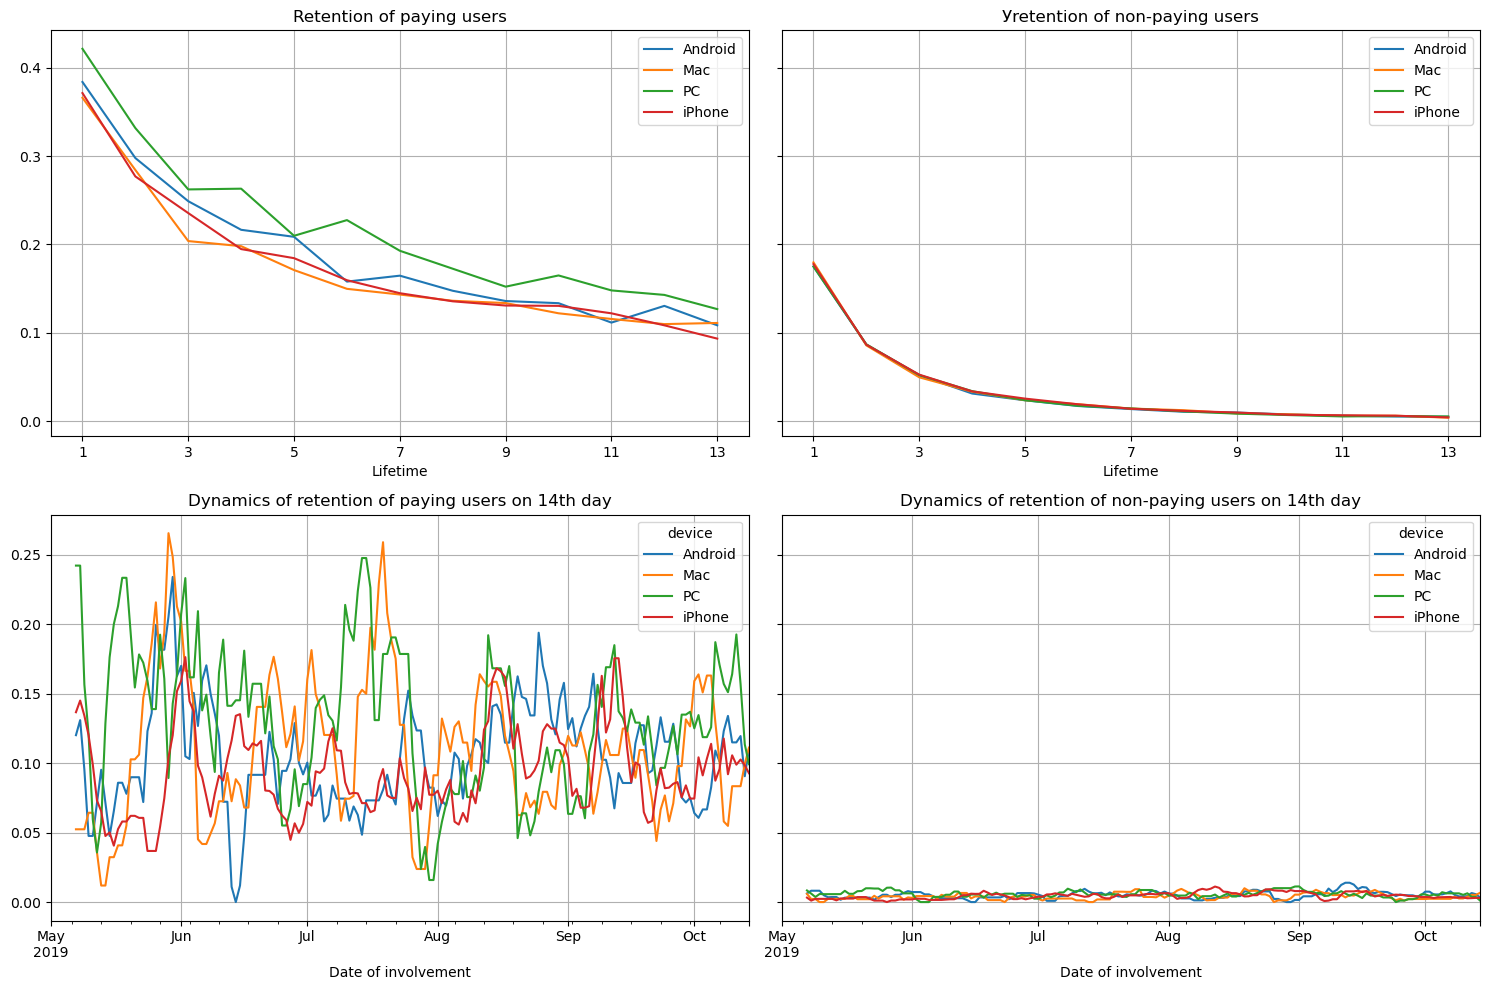

In [40]:
group_by = ['device']

retention_raw, retention_by_device, retention_trend = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=group_by
)

plot_retention(retention_by_device, retention_trend, horizon_days)


**Conclusion:** retention of paying users is similar for all devices, non-paying users of all devices have little or no retention.

**Analyze advertising ROI by country:**

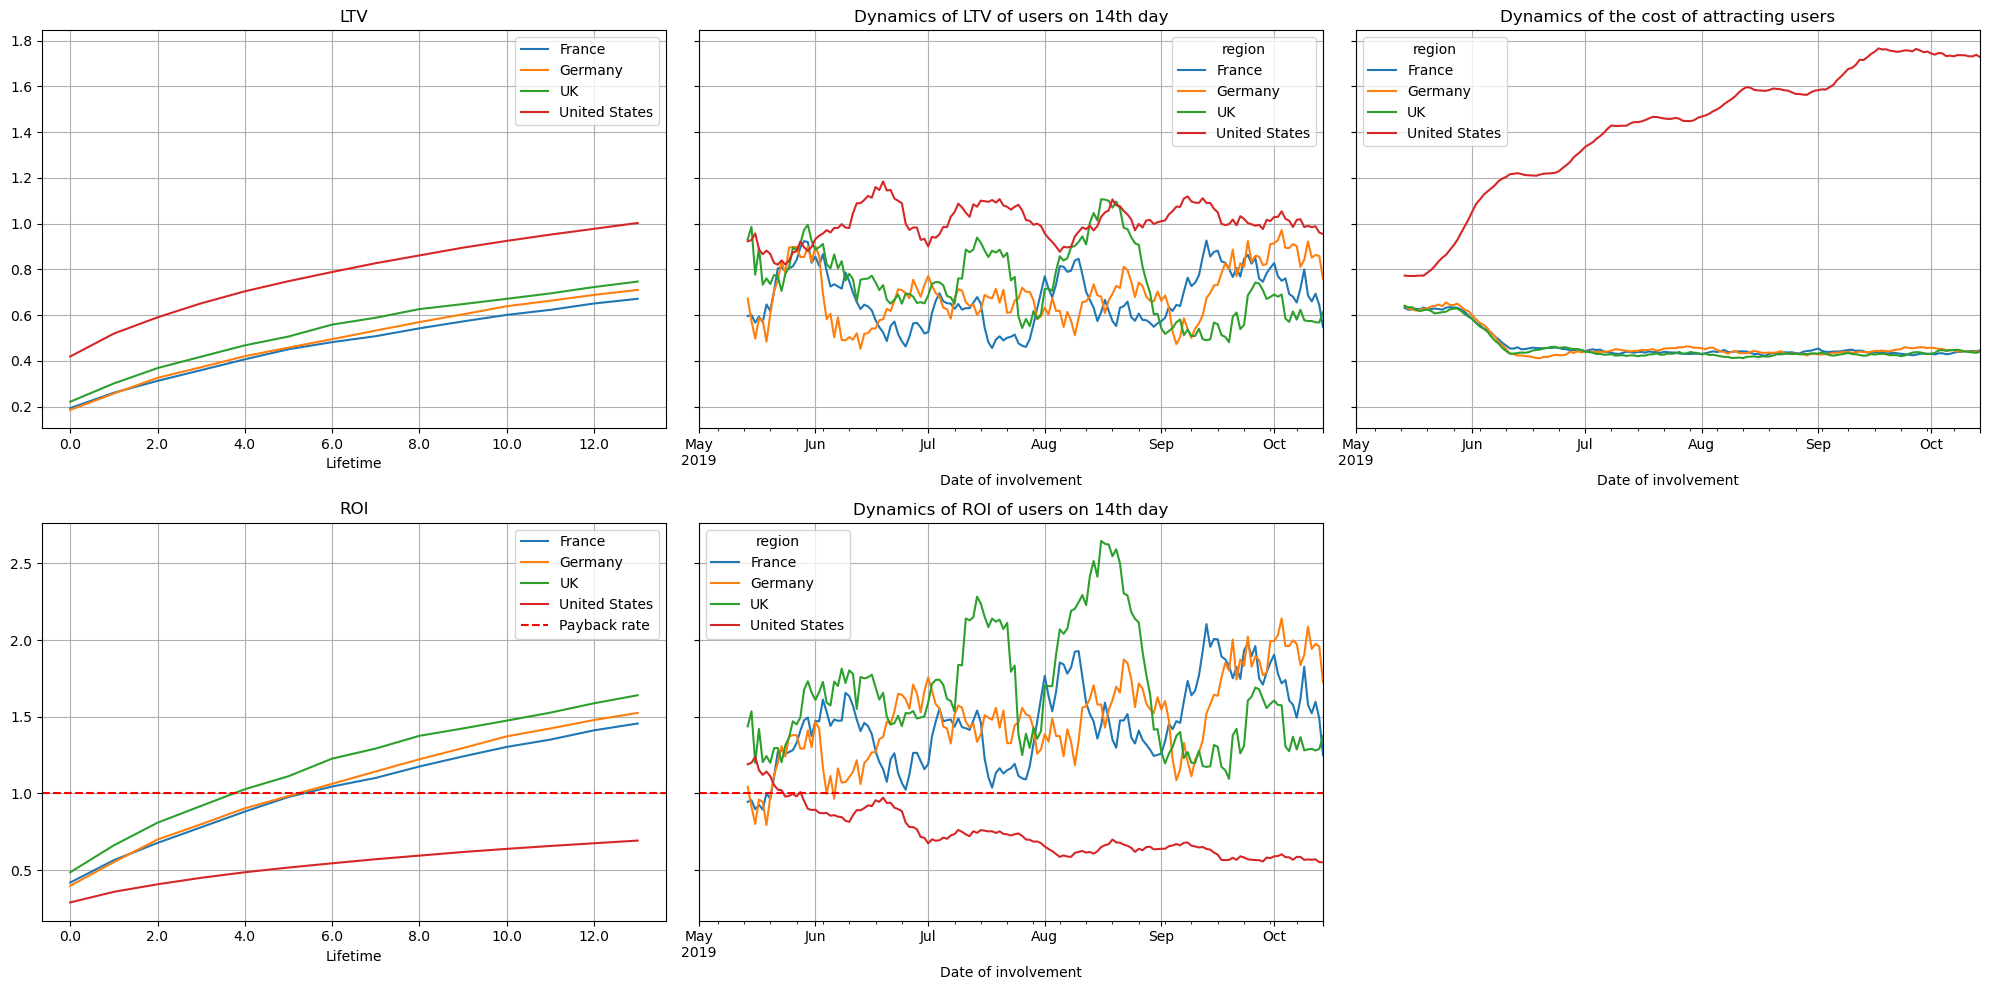

In [41]:
group_by = ['region']

ltv_data, ltv_by_region, ltv_trend, roi_by_region, roi_trend = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=group_by
)

plot_ltv_roi(
    ltv_by_region,
    ltv_trend,
    roi_by_region,
    roi_trend,
    horizon_days,
    window=14
)


**LTV**
- The highest in **USA**, **France**, **Germany** and **UK** are on the same level.


**CAC**
- Significantly higher in **USA**, in other regions remains stable and low.


**ROI**
- The highest in **Germany**(**ROI > 1**).
- **France** and **UK** achieve ROI.
- **USA** remain unprofitable(**ROI < 1**).


**Dynamics on day 14**.
- Strong fluctuations are noticeable in **USA**.
- In other regions, the figures are stable.


Thus, the reason for the app's unprofitability is related to the behavior of US users. Although they have a high LTV, their ROI remains lower than in other countries and does not actually reach ROI. This is due to the high CAC, which continues to rise rapidly. The fall in ROI coincides with a sharp increase in advertising costs.

**Analyze conversion rates by region:**

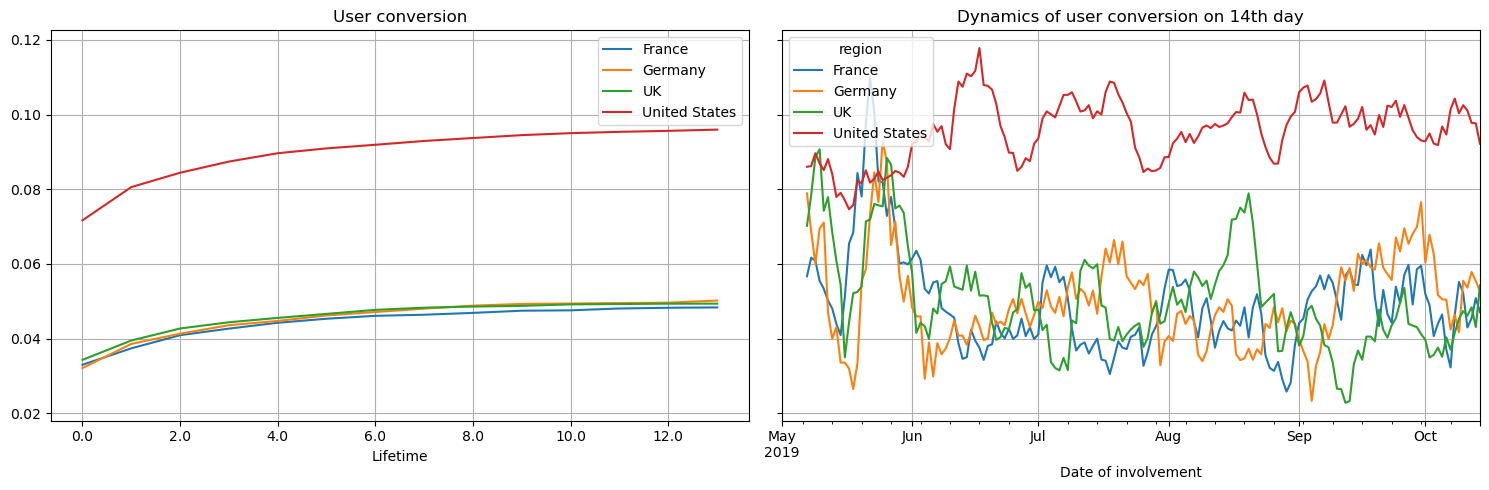

In [42]:
group_by = ['region']

conversion_data, conversion_by_region, conversion_trend = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=group_by
)

plot_conversion(conversion_by_region, conversion_trend, horizon_days)


**Conclusion:**


**User Conversion**
- Users from **USA** have the highest conversion rate (up to **10%**) over the Lifetime, significantly outperforming other regions.


**Conversion dynamics on day 14**
- Conversion of users from **US** remains consistently high.
- In other countries, it is lower and less stable. 


**Calculate user retention by region:**

In [ ]:
retention_data, retention_by_region, retention_trend = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_by_region, retention_trend, horizon_days)

**Conclusions:**


**Retention of paying users**.
- Users from **US** have the lowest retention on all of Lifetime.


Retention of non-paying users**Retention of non-paying users**
- Regardless of region, retention of non-paying users drops quickly to zero and hardly differs between countries.


**Dynamics on day 14**.
- The **US** has significantly lower retention rates.
- Retention of non-payers remains minimal.


**Let's analyze the return on advertising depending on the channel of attraction:**

In [ ]:
group_by = ['channel']

ltv_data, ltv_by_channel, ltv_trend, roi_by_channel, roi_trend = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=group_by
)

plot_ltv_roi(
    ltv_by_channel,
    ltv_trend,
    roi_by_channel,
    roi_trend,
    horizon_days,
    window = 14
)

**Conclusion**.
- Channels**FaceBoom** and **TipTop** require optimization due to high costs and low ROI.
- **LambdaMedaAds**, **Yrabbit** and **MediaTornado** show the best results. 


**Let's analyze the conversion rate by channel of attraction:**

In [ ]:
group_by = ['channel']

conversion_data, conversion_by_channel, conversion_trend = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=group_by
)

plot_conversion(conversion_by_channel, conversion_trend, horizon_days)

**Conclusions:**


**Low Conversion**
- **OppleCreativeMedia**, **MediaTornado**, **YRabbit**, and **LeapBob** show poor performance.


**Unstable Dynamics**.
- **LambdaMediaAds** Characterized by sudden spikes and drops, which reduces reliability.


**Stable Channels.
- **AdNonSense** and **FaceBoom** demonstrate steady conversion and engagement.


**Analyze user retention by engagement channel:**


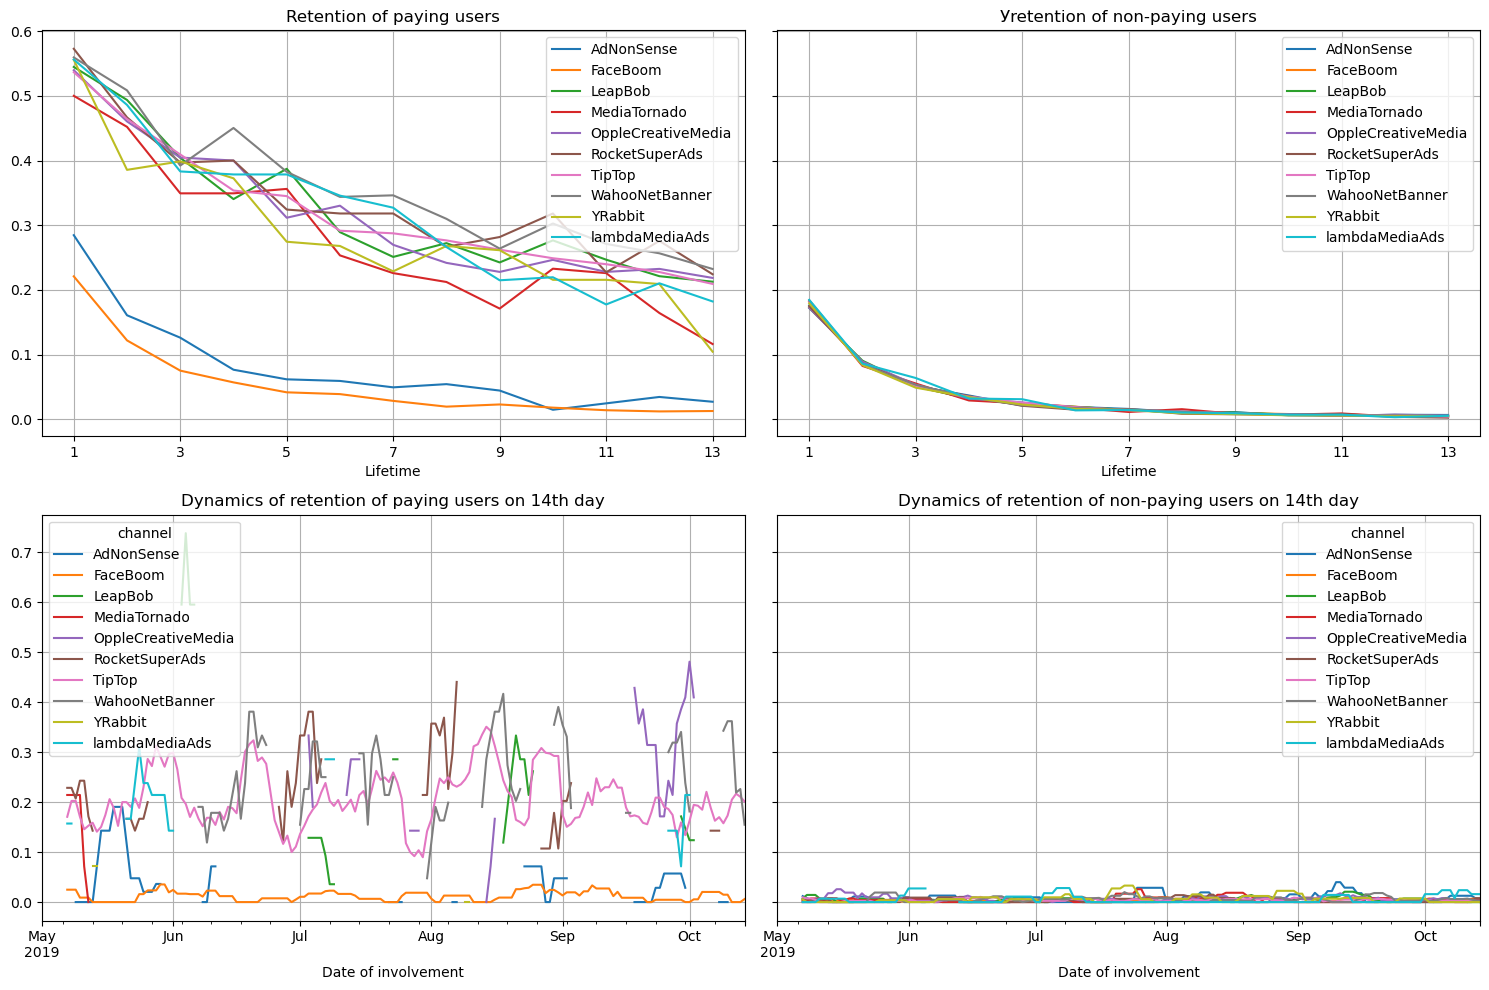

In [43]:
retention_data, retention_by_channel, retention_trend = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_by_channel, retention_trend, horizon_days)

**Conclusions:**


**Retention of paying users**
- **AdNonSense** and **FaceBoom** show the lowest retention rates across Lifetime, making them ineffective channels.
- The remaining channels show more consistent results.


**Retention of non-paying users**
- Virtually identical reduction for all channels, with a quick zero level.

### Key findings


#### Markets and Regions
- ** TheUS**is the largest market in terms of users and payers, but high **CAC** makes this region unprofitable.
- European countries(**Germany**, **France**, **UK**) show stable**ROI** and lower costs, making them promising for increased marketing investment.


#### Devices
- **Mac** and **iPhone** demonstrate the highest **LTV** and conversions.
- However,**iPhone** remains unprofitable due to high**CAC**.
- Owners of**PCs** show better ROI, making them a prioritized audience to retain.


#### Engagement Channels
- **FaceBoom** and **TipTop**:
- Dominate in spending, but show low **ROI** due to high**CAC** and poor retention.
-**LambdaMediaAds**, **YRabbit**, and **MediaTornado**:
- Demonstrate good conversion rates and **ROI**, although they require further analysis.


#### Retention
- Retention of paying users:
- In the **US** is significantly lower than in other regions.
- User retention by channel:
- **FaceBoom** and **AdNonSense** have the worst retention, making them economically ineffective.


#### Conversion and ROI dynamics
- **US**:
- Conversions remain high, but **ROI**isn 't reaching ROI levels due to rising costs.
- Organic traffic:
- Declines since **May 2019**, negatively impacting conversion rates in Europe. 

---

### Recommendations for the marketing department


#### Optimize costs in the US
- Reduce marketing spend in **US**, especially in **FaceBoom** and **TipTop** channels, which are not paying off.
- Reallocate budgets to the European market, where **CAC** is lower and efficiency is higher.


#### Increase European market share
- Increase marketing efforts in **Germany**, **France** and **UK** where **ROI** consistently exceeds 1.
- Focus on **PC** and **Android** users, which show high growth potential.


#### Revise channel strategy
- Analyze the effectiveness of **FaceBoom** and **TipTop** channels .
- Reallocate budgets to more effective channels such as **LambdaMediaAds**, **YRabbit**, and **MediaTornado**.
- Reduce spending on weaker channels such as**AdNonSense** and**OppleCreativeMedia**.


#### Product Performance
- Optimize **UX** to improve user retention across all devices, especially for **Android** and **PCs**.
- Investigate the reasons for the decline in organic traffic since**May 2019**and take steps to restore it.


#### Additional Measures
- Analyze user behavior from **US** to identify reasons for low retention and ROI.
- Improve ad quality through more precise targeting and better creative.
